# Birkhoff polytope

The Birkhoff polytope is a popular model used to derive polytope structures from mathematics. It arises from squared matrices $M \in [0,1]^{n \times n}$ whose column and row sums are equal to $1$. *hopsy* provides a convenience class for generating Birkhoff polytopes of arbitrary size.

In [1]:
import hopsy
import numpy as np
import scipy
import matplotlib.pyplot as plt
import arviz

Generate uniform sampling problem on the 3-dimensional Birkhoff polytope:

In [2]:
bp = hopsy.BirkhoffPolytope(3)
problem = hopsy.Problem(bp.A, bp.b)
problem.starting_point = hopsy.compute_chebyshev_center(problem)
problem = hopsy.round(problem)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-30


Sample the problem and verify convergence:

In [3]:
n_samples = 5000
n_chains = 4
mcs = [hopsy.MarkovChain(problem, hopsy.UniformCoordinateHitAndRunProposal) for i in range(n_chains)]
rngs = [hopsy.RandomNumberGenerator(seed=42, stream=i) for i in range(n_chains)]

meta, samples = hopsy.sample(mcs, rngs, n_samples=n_samples, thinning=problem.A.shape[1]**2//6, n_procs=n_chains)
hopsy.rhat(samples), hopsy.ess(samples)

(array([[1.00034304, 1.00039326, 1.00091834, 1.00156559]]),
 array([[5256.24117096, 5350.23984171, 4018.57055206, 4524.92053992]]))

Convert the samples back to the full space and plot the full space samples:

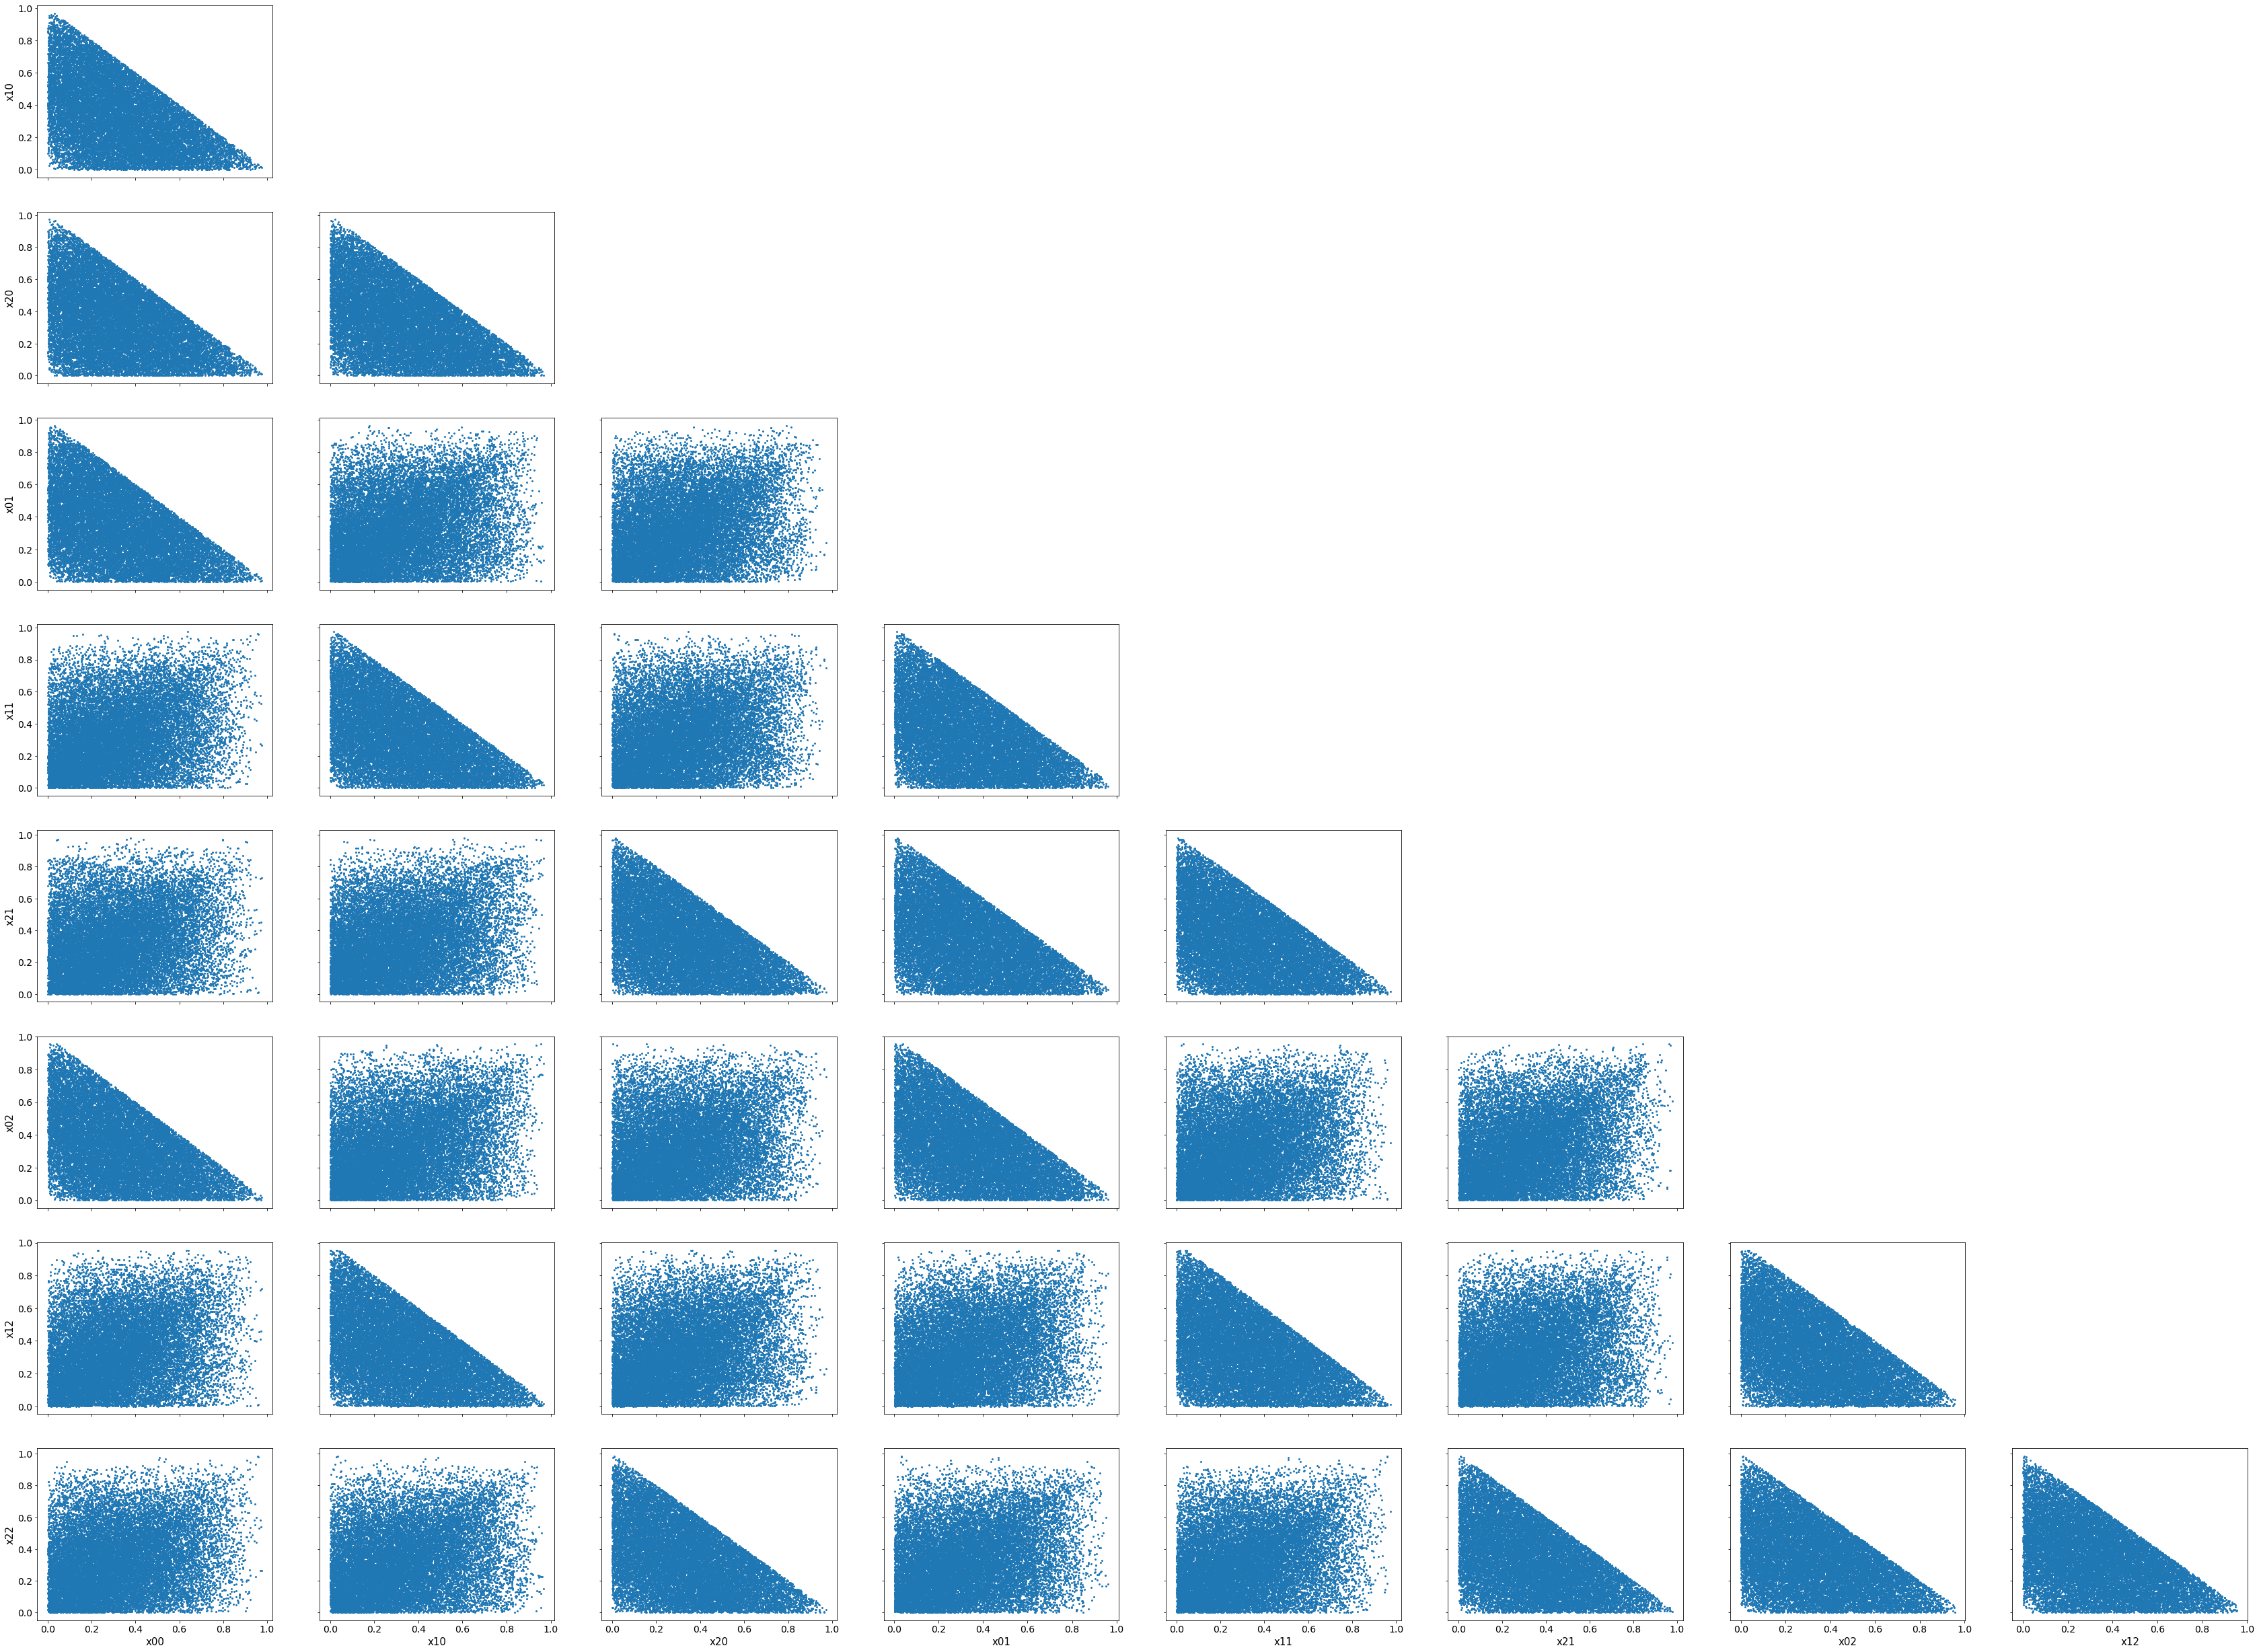

In [4]:
samples_full = bp.convert_to_full_space(samples.reshape((-1, problem.A.shape[1])))

arviz.plot_pair(arviz.convert_to_inference_data({f"x{i % bp.size}{i // bp.size}":samples_full[i, :] for i in range(bp.size_squared)}))
plt.show()